## Generating pitch variation plot over a broader range of pitches for the AMS figure

Remember that I have a slant on these results!!!

In [9]:
import sys
sys.path.append('/Users/sstk4353/packages/.')

from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('./')


In [ ]:
pol_list = ['H', 'V']
size_list = ['1000']
pitch_list = list(range(0,26))
slant = 0.5
slant_name = '05'


In [5]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'

BERNARD_PATH = 'Bernard/'
ELLIPSOID_COMPARISON = 'Ellipsoid/'

In [4]:
pitch_result_dict = {x : {s: {y : None for y in pitch_list} for s in size_list}for x in pol_list}

In [6]:

for pol in pol_list:
    for size in size_list:
        for pitch in pitch_list:
            
            output_path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/body_pitch_sweep/Bernard_parameterised_560_{pol}_M_{size}_body_p{pitch}_s05_df.csv'
            df = pd.read_csv(output_path)
            pitch_result_dict[pol][size][pitch] = df

In [7]:
pitch_plot_list = [0,4,8,12,14,16,20,24]

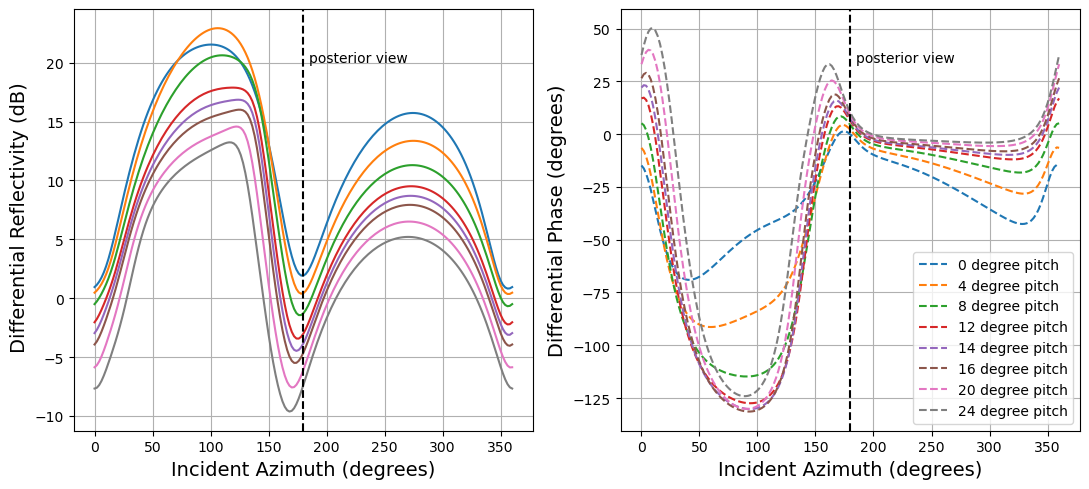

In [22]:
fig, axes = plt.subplots(1,2, figsize=(11,5))

#colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

for pitch in pitch_plot_list:
    dp = DualPol(pitch_result_dict['H']['1000'][pitch], pitch_result_dict['V']['1000'][pitch], read_from_df=True)
    dp._calculate_differential_reflectivity()
    dp._calculate_differential_phase(de_alias=True)
    axes[0].plot(df['phi'], dp.differential_reflectivity, label=f'{pitch} degree pitch')    
    axes[1].plot(df['phi'], dp.differential_phase, label=f'{pitch} degree pitch', linestyle = '--')   

for ax in axes:
    # Draw the vertical line
    ax.axvline(x=180, linestyle='--', color='black')
    
    # Get current y-limits to place text in the middle
    y_min, y_max = ax.get_ylim()
    y_pos = y_max - (y_max - y_min) * 0.1  # 10% below top

    # Add text label near the line
    ax.text(185, y_pos, 'posterior view', rotation=0, va='top', ha='left', color='black')
    ax.grid()

axes[1].legend()
axes[0].set_ylabel(' Differential Reflectivity (dB)', fontsize =14)
axes[0].set_xlabel('Incident Azimuth (degrees)', fontsize =14)
axes[1].set_xlabel('Incident Azimuth (degrees)', fontsize =14)
axes[1].set_ylabel('Differential Phase (degrees)', fontsize =14)


#fig.suptitle('Sensitivity of the dual-polarisation scattering properties to differential phase on transmission with 10 degree pitch',fontsize=13)

fig.tight_layout()

fig.savefig('./AMS_poster_plots/pitch_variation_0_24.svg')

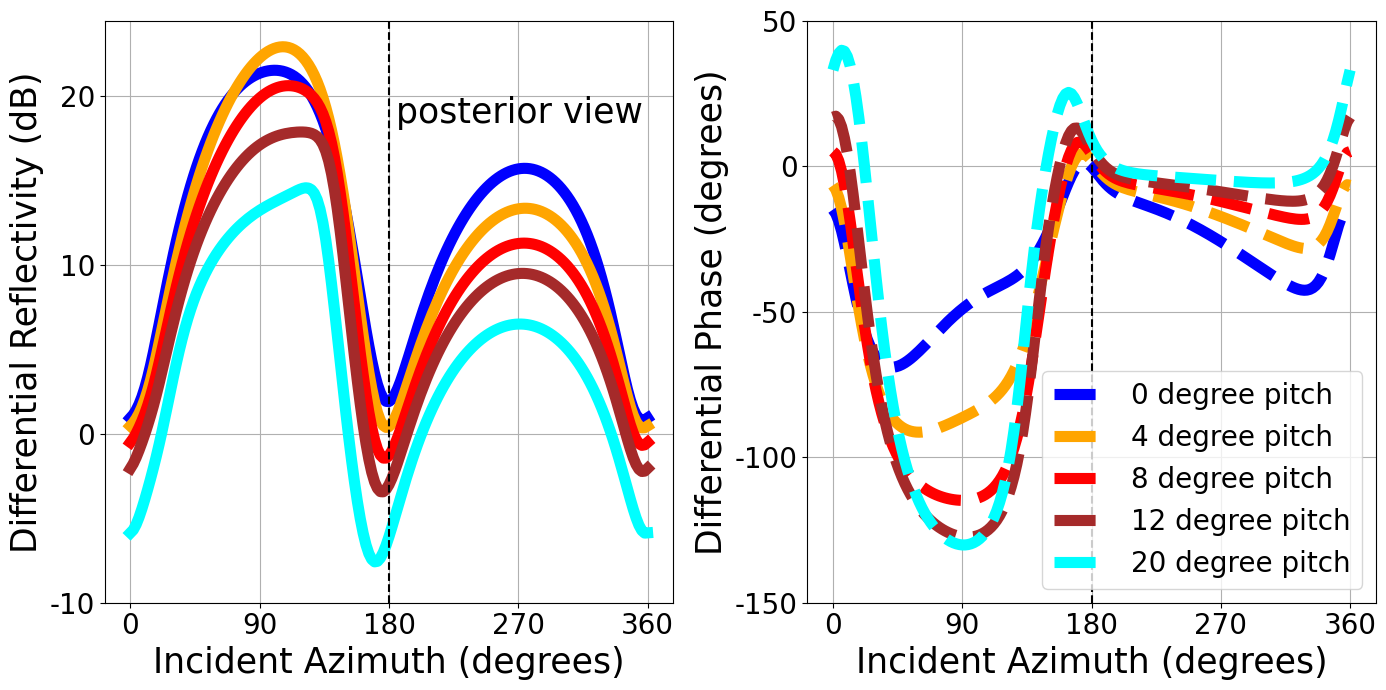

In [55]:
fig, axes = plt.subplots(1,2, figsize=(14,7))

colors = ['blue', 'orange', 'red', 'brown', 'cyan', 'brown', 'pink']

fontsize=25
linewidth=8

counter = 0 
for pitch in [0,4,8,12,20]:
    dp = DualPol(pitch_result_dict['H']['1000'][pitch], pitch_result_dict['V']['1000'][pitch], read_from_df=True)
    dp._calculate_differential_reflectivity()
    dp._calculate_differential_phase(de_alias=True)
    axes[0].plot(df['phi'], dp.differential_reflectivity, label=f'{pitch} degree pitch', linewidth=linewidth, color = colors[counter])    
    axes[1].plot(df['phi'], dp.differential_phase, label=f'{pitch} degree pitch', linestyle = '--', linewidth=linewidth, color = colors[counter])  
    counter += 1

for ax in axes:
    # Draw the vertical line
    ax.axvline(x=180, linestyle='--', color='black')
    
    # Get current y-limits to place text in the middle
    y_min, y_max = ax.get_ylim()
    y_pos = y_max - (y_max - y_min) * 0.1  # 10% below top

    # Add text label near the line
    #ax.text(185, y_pos, 'posterior view', rotation=0, va='top', ha='left', color='black')
    ax.grid()
axes[1].legend(fontsize=20)
axes[0].text(185,20, 'posterior view', rotation=0, va='top', ha='left', color='black', fontsize=fontsize)
axes[0].set_ylabel(' Differential Reflectivity (dB)', fontsize =14)
axes[0].set_xlabel('Incident Azimuth (degrees)', fontsize =14)
axes[1].set_xlabel('Incident Azimuth (degrees)', fontsize =14)
axes[1].set_ylabel('Differential Phase (degrees)', fontsize =14)

axes[0].set_ylabel('Differential Reflectivity (dB)', fontsize =fontsize)
axes[0].set_xlabel('Incident Azimuth (degrees)', fontsize =fontsize)
axes[1].set_xlabel('Incident Azimuth (degrees)', fontsize =fontsize)
axes[1].set_ylabel('Differential Phase (degrees)', fontsize =fontsize)

for ax in axes:
    ax.set_xticks([0,90,180,270,360])                      # positions
    ax.set_xticklabels([0,90,180,270,360], fontsize=20)    # labels + fontsize

axes[1].set_yticks([-150,-100,-50,0,50])
axes[1].set_yticklabels([-150,-100,-50,0,50], fontsize=20)  

axes[0].set_yticks([-10, 0, 10, 20])
axes[0].set_yticklabels([-10, 0, 10, 20], fontsize=20)  


#fig.suptitle('Sensitivity of the dual-polarisation scattering properties to differential phase on transmission with 10 degree pitch',fontsize=13)

fig.tight_layout()

fig.savefig('./AMS_poster_plots/pitch_variation_0_24_v3_cb_friendly.svg')